In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(r'/Users/jiezhang/Documents/7001 introduction to data science/group project/koala data/project data /koalabase combined_clean.xlsx', 
sheet_name='Sheet1')
df.replace({False: 0, True: 1}, inplace=True)

In [124]:
feature_cols = ['Conjunctivitis', 'Cystitis', 'Wasted', 'Bursitis','CANCER','Pneumonia','Chlamydiosis','BLIND','Nephritis','Sick']
X = df[feature_cols] # Features
y = df.Dead # Target variable

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [126]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=14)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [127]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14592,    30],
       [ 2292,   140]])

Text(0.5, 257.44, 'Predicted label')

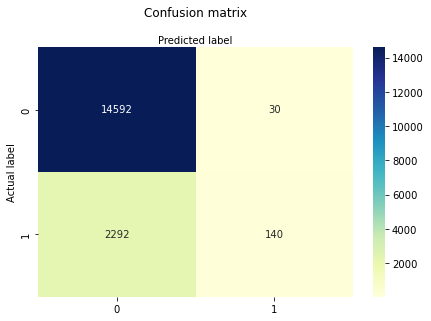

In [128]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [129]:
from sklearn.metrics import classification_report
target_names = ['Non sick', 'Sick']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Non sick       0.86      1.00      0.93     14622
        Sick       0.82      0.06      0.11      2432

    accuracy                           0.86     17054
   macro avg       0.84      0.53      0.52     17054
weighted avg       0.86      0.86      0.81     17054



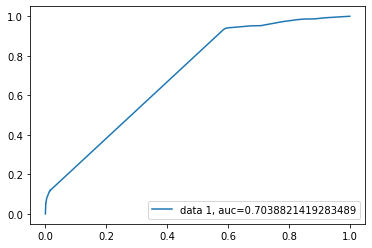

In [130]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(X_train)
identified_clusters = kmeans.predict(X_test)
identified_clusters
centers = kmeans.cluster_centers_
print(centers)

[[6.03749603e-03 9.25484588e-03 2.40705434e-02 7.94407372e-05
  5.16364792e-04 2.38322212e-03 7.94407372e-05 3.37623133e-03
  7.94407372e-05 1.52655666e-14]
 [3.87794198e-01 5.23877942e-01 4.86247947e-01 3.21565408e-03
  2.94198139e-03 1.53256705e-02 7.25232622e-03 8.21018062e-03
  2.66830870e-03 9.74753695e-01]]


In [132]:
distortions = []
K=range(1,10)
for k in K:
    kmeanModel = KMeans(k)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)
print(distortions)

[27397.784856251066, 12836.902420359227, 8990.109546042346, 6984.5156871587005, 5623.850331603297, 4380.8977032512885, 3298.5702020119115, 2673.128254841634, 2048.332673861664]


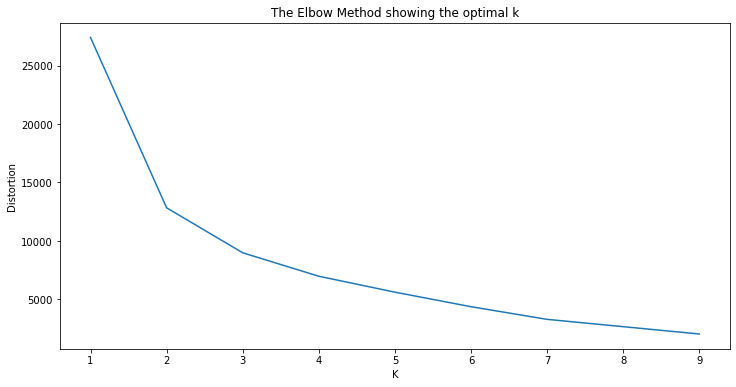

In [133]:
# Plot the distortions of K means
plt.figure(figsize=(12,6))
plt.plot(K, distortions)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [134]:
score = metrics.accuracy_score(y_test,kmeans.predict(X_test))
print(score)

0.5184707400023455


In [135]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [136]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8614987686173332


In [137]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.6073619631901841
Recall: 0.08141447368421052


In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train) 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))
train_accuracy = knn.score(X_train, y_train)
print(train_accuracy)
test_accuracy= knn.score(X_test, y_test)
print(test_accuracy)

[0 0 0 ... 0 0 0]
0.8563530357860877
0.8603846604902076


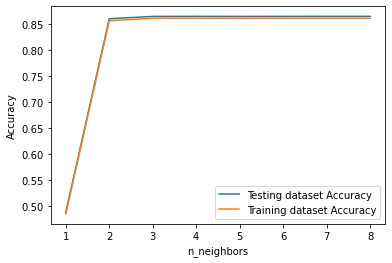

In [139]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

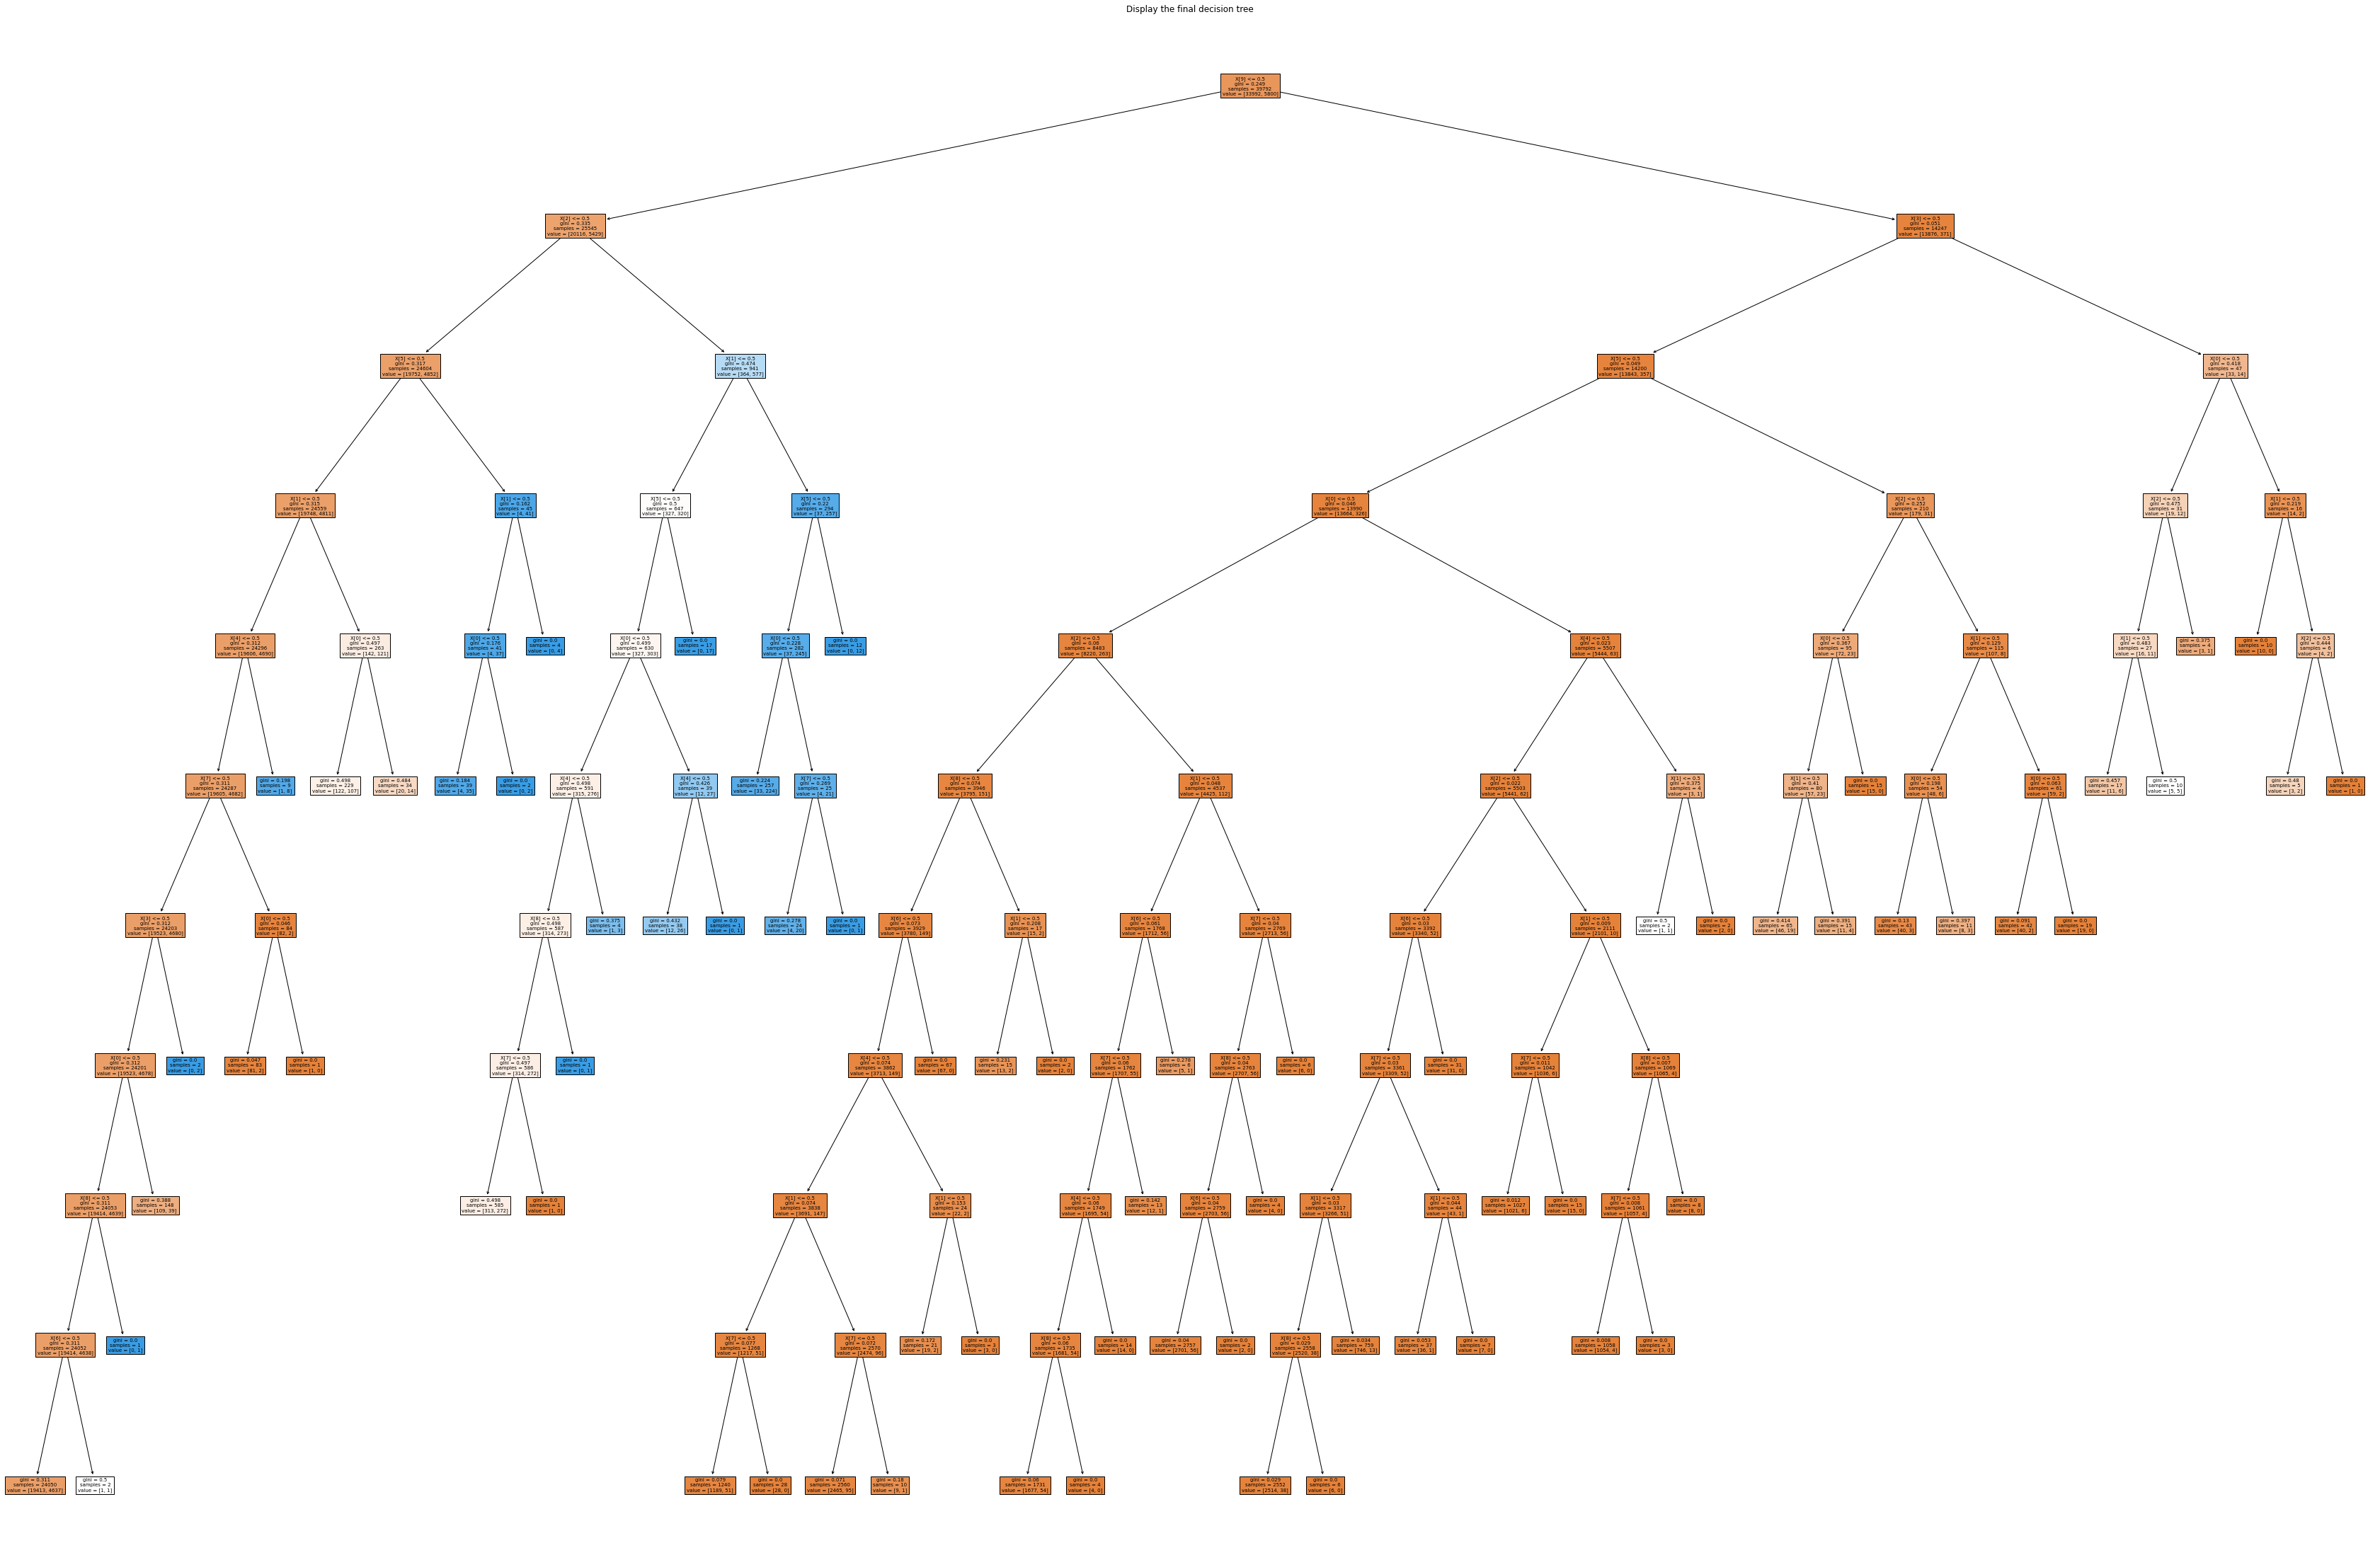

In [140]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
# output size of decision tree
plt.figure(figsize=(60,40))
# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Display the final decision tree")
plt.show()

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8614987686173332